In [194]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("reshape2")
# install.packages("MASS")
# install.packages("forecast")

library(ggplot2)
library(dplyr)
library(reshape2)
library(forecast)

options(warn = -1)
suppressPackageStartupMessages(library(dplyr))

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [36]:
df = read.csv("world_development_data_interpolated.csv")

# tamaño df
dim(df)

[1] 9947   33

In [74]:
# ¿aquí no se empieza a contar desde 0?
head(df)

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopDens,PopGrowth,GDP,GDPGrowth,AdolFertRate,⋯,MerchTradeGDP,MilExpGDP,MobileSubs100,MortRateU5,NetMigr,PopTotal,RevenueExGrantsGDP,SchEnrollPrim,TaxRevenueGDP,UrbanPopGrowth
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,652860,17.74727,2.524421,1733333264,NA,142.874,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.688982
2,1973,Netherlands,Europe,Western Europe,41530,398.08418,0.827331,71840909664,5.444223,16.931,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.2941,100.04730,22.46063,1.337022
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,1001450,37.29045,2.151183,10098534613,3.506830,123.414,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.007695
5,1973,Gabon,Africa,Sub-Saharan Africa,267670,2.46551,2.067382,722780701,10.182434,186.627,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.959430
10,1973,Haiti,Americas,Latin America and the Caribbean,27750,179.27104,1.788787,466798975,4.755322,71.989,⋯,29.13460,NA,NA,227.8,-18699,4940710,NA,55.48163,NA,1.921501
11,1973,Central African Republic,Africa,Sub-Saharan Africa,622980,3.52484,1.944737,271183082,1.888940,169.247,⋯,32.81916,NA,NA,211.0,-9802,2195905,NA,57.08943,NA,4.959955


In [76]:
colSums(is.na(df))

# vemos que cuando hay huecos vacíos no lo reconoce como NA, se van a reemplazar por NA

Year            Country             Region          SubRegion 
                 0                  0                  0                  0 
      SurfAreaSqKm            PopDens          PopGrowth                GDP 
                28                126                  0                  0 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
               312                  0               1207               1252 
          FertRate          FDINetBoP        GNICapAtlas           GNIAtlas 
               126                574                801                800 
   GrossCapFormGDP         ImportsGDP       IndValAddGDP       InflConsPric 
              1509               1252               1256                317 
      LifeExpBirth      MerchTradeGDP          MilExpGDP      MobileSubs100 
               121                349               2435                407 
        MortRateU5            NetMigr           PopTotal RevenueExGrantsGDP 
               523                  0                  0               4502 
     SchEnrollPrim      TaxRevenueGDP     UrbanPopGrowth 
              1322               4448                  0

In [78]:
df[df=='']= NA

head(df)

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopDens,PopGrowth,GDP,GDPGrowth,AdolFertRate,⋯,MerchTradeGDP,MilExpGDP,MobileSubs100,MortRateU5,NetMigr,PopTotal,RevenueExGrantsGDP,SchEnrollPrim,TaxRevenueGDP,UrbanPopGrowth
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,652860,17.74727,2.524421,1733333264,NA,142.874,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.688982
2,1973,Netherlands,Europe,Western Europe,41530,398.08418,0.827331,71840909664,5.444223,16.931,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.2941,100.04730,22.46063,1.337022
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,1001450,37.29045,2.151183,10098534613,3.506830,123.414,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.007695
5,1973,Gabon,Africa,Sub-Saharan Africa,267670,2.46551,2.067382,722780701,10.182434,186.627,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.959430
10,1973,Haiti,Americas,Latin America and the Caribbean,27750,179.27104,1.788787,466798975,4.755322,71.989,⋯,29.13460,NA,NA,227.8,-18699,4940710,NA,55.48163,NA,1.921501
11,1973,Central African Republic,Africa,Sub-Saharan Africa,622980,3.52484,1.944737,271183082,1.888940,169.247,⋯,32.81916,NA,NA,211.0,-9802,2195905,NA,57.08943,NA,4.959955


In [79]:
colSums(is.na(df))
# se ha reemplado correctamente pero es mejor ver el % de NA

Year            Country             Region          SubRegion 
                 0                  0                  0                  0 
      SurfAreaSqKm            PopDens          PopGrowth                GDP 
                28                126                  0                  0 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
               312                  0               1207               1252 
          FertRate          FDINetBoP        GNICapAtlas           GNIAtlas 
               126                574                801                800 
   GrossCapFormGDP         ImportsGDP       IndValAddGDP       InflConsPric 
              1509               1252               1256                317 
      LifeExpBirth      MerchTradeGDP          MilExpGDP      MobileSubs100 
               121                349               2435                407 
        MortRateU5            NetMigr           PopTotal RevenueExGrantsGDP 
               523                  0                  0               4502 
     SchEnrollPrim      TaxRevenueGDP     UrbanPopGrowth 
              1322               4448                  0

In [81]:
porcent_NA= (colSums(is.na(df))/ nrow(df))*100
sort(porcent_NA, decreasing= TRUE)

RevenueExGrantsGDP      TaxRevenueGDP          MilExpGDP    GrossCapFormGDP 
        51.9381634         51.3151823         28.0918320         17.4088602 
     SchEnrollPrim       IndValAddGDP         ExportsGDP         ImportsGDP 
        15.2514998         14.4900784         14.4439317         14.4439317 
     AgriValAddGDP        GNICapAtlas           GNIAtlas          FDINetBoP 
        13.9247808          9.2408860          9.2293493          6.6220581 
        MortRateU5      MobileSubs100      MerchTradeGDP       InflConsPric 
         6.0336871          4.6954315          4.0263036          3.6571297 
         GDPGrowth            PopDens           FertRate       LifeExpBirth 
         3.5994462          1.4536225          1.4536225          1.3959391 
      SurfAreaSqKm               Year            Country             Region 
         0.3230272          0.0000000          0.0000000          0.0000000 
         SubRegion          PopGrowth                GDP       AdolFertRate 
         0.0000000          0.0000000          0.0000000          0.0000000 
           NetMigr           PopTotal     UrbanPopGrowth 
         0.0000000          0.0000000          0.0000000

## Se ve que domestic credit tiene un 88% de nulos. Y que IntermRegion no va a aportar mucho más valor. Se van a eliminar. ¿Qué hago con RevenueExGrants.GDP y TaxRevenue.GDP?

In [84]:
df= df[, !colnames(df) %in% c("DomCredit.GDP", "IntermRegion")]
head(df,10)

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopDens,PopGrowth,GDP,GDPGrowth,AdolFertRate,⋯,MerchTradeGDP,MilExpGDP,MobileSubs100,MortRateU5,NetMigr,PopTotal,RevenueExGrantsGDP,SchEnrollPrim,TaxRevenueGDP,UrbanPopGrowth
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,652860,17.747275,2.524421,1733333264,NA,142.874,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.688982
2,1973,Netherlands,Europe,Western Europe,41530,398.084182,0.827331,71840909664,5.444223,16.931,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.29410,100.04730,22.460626,1.337022
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,1001450,37.290448,2.151183,10098534613,3.506830,123.414,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.007695
5,1973,Gabon,Africa,Sub-Saharan Africa,267670,2.465510,2.067382,722780701,10.182434,186.627,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.959430
10,1973,Haiti,Americas,Latin America and the Caribbean,27750,179.271045,1.788787,466798975,4.755322,71.989,⋯,29.13460,NA,NA,227.8,-18699,4940710,NA,55.48163,NA,1.921501
11,1973,Central African Republic,Africa,Sub-Saharan Africa,622980,3.524840,1.944737,271183082,1.888940,169.247,⋯,32.81916,NA,NA,211.0,-9802,2195905,NA,57.08943,NA,4.959955
12,1973,Spain,Europe,Southern Europe,505990,70.008698,1.104938,78639525985,7.788465,16.672,⋯,18.90271,2.110742,NA,25.2,9876,34988947,18.16159,110.02917,9.320855,2.111097
13,1973,Malaysia,Asia,South-eastern Asia,330800,33.671173,2.387980,7662903760,11.701082,55.696,⋯,71.76131,3.872243,NA,47.8,-25703,11062664,NA,NA,NA,4.752699
15,1973,Cuba,Americas,Latin America and the Caribbean,109890,86.572849,1.393140,9987709650,3.434489,151.561,⋯,32.06941,NA,NA,31.4,-64655,9297924,NA,121.70627,NA,2.701684


In [86]:
sapply(df, class)
# solo el año es entero. 3 son caracteres y el resto números decimales. 
#Investigo los caracteres por si hay alguna falta de tipo

Year            Country             Region          SubRegion 
         "integer"        "character"        "character"        "character" 
      SurfAreaSqKm            PopDens          PopGrowth                GDP 
         "numeric"          "numeric"          "numeric"          "numeric" 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
         "numeric"          "numeric"          "numeric"          "numeric" 
          FertRate          FDINetBoP        GNICapAtlas           GNIAtlas 
         "numeric"          "numeric"          "numeric"          "numeric" 
   GrossCapFormGDP         ImportsGDP       IndValAddGDP       InflConsPric 
         "numeric"          "numeric"          "numeric"          "numeric" 
      LifeExpBirth      MerchTradeGDP          MilExpGDP      MobileSubs100 
         "numeric"          "numeric"          "numeric"          "numeric" 
        MortRateU5            NetMigr           PopTotal RevenueExGrantsGDP 
         "numeric"          "numeric"          "numeric"          "numeric" 
     SchEnrollPrim      TaxRevenueGDP     UrbanPopGrowth 
         "numeric"          "numeric"          "numeric"

In [88]:
# unique(df$Country).count()
length(unique(df$Country)) 
#¿203 países?

[1] 202

In [90]:
df$Country= trimws(df$Country)
df$Country= tolower(df$Country)
length(unique(df$Country)) 

unique(df$Country)

# se ve que hay países que no están reconocidos por la ONU. 
#De cualquier modo, no se eliminarán, solo hay 10 países de diferencia

[1] 202

[1] "afghanistan"                    "netherlands"                   
  [3] "egypt, arab rep."               "gabon"                         
  [5] "haiti"                          "central african republic"      
  [7] "spain"                          "malaysia"                      
  [9] "cuba"                           "saudi arabia"                  
 [11] "sudan"                          "new caledonia"                 
 [13] "argentina"                      "venezuela, rb"                 
 [15] "germany"                        "ghana"                         
 [17] "el salvador"                    "liechtenstein"                 
 [19] "kenya"                          "togo"                          
 [21] "bolivia"                        "philippines"                   
 [23] "kiribati"                       "korea, rep."                   
 [25] "colombia"                       "nepal"                         
 [27] "greece"                         "portugal"                      
 [29] "botswana"                       "ireland"                       
 [31] "andorra"                        "thailand"                      
 [33] "ecuador"                        "indonesia"                     
 [35] "france"                         "suriname"                      
 [37] "guyana"                         "pakistan"                      
 [39] "burundi"                        "belgium"                       
 [41] "honduras"                       "japan"                         
 [43] "panama"                         "seychelles"                    
 [45] "costa rica"                     "belize"                        
 [47] "mexico"                         "nicaragua"                     
 [49] "turkiye"                        "eswatini"                      
 [51] "paraguay"                       "cameroon"                      
 [53] "gambia, the"                    "united states"                 
 [55] "jamaica"                        "sierra leone"                  
 [57] "congo, rep."                    "madagascar"                    
 [59] "canada"                         "st. kitts and nevis"           
 [61] "austria"                        "tunisia"                       
 [63] "benin"                          "iceland"                       
 [65] "australia"                      "uruguay"                       
 [67] "papua new guinea"               "south africa"                  
 [69] "trinidad and tobago"            "congo, dem. rep."              
 [71] "mauritania"                     "united kingdom"                
 [73] "peru"                           "india"                         
 [75] "cambodia"                       "st. vincent and the grenadines"
 [77] "nigeria"                        "senegal"                       
 [79] "bermuda"                        "equatorial guinea"             
 [81] "singapore"                      "luxembourg"                    
 [83] "jordan"                         "sri lanka"                     
 [85] "french polynesia"               "hong kong sar, china"          
 [87] "cote d'ivoire"                  "italy"                         
 [89] "new zealand"                    "chad"                          
 [91] "bahamas, the"                   "niger"                         
 [93] "somalia"                        "denmark"                       
 [95] "brazil"                         "uganda"                        
 [97] "algeria"                        "bangladesh"                    
 [99] "iran, islamic rep."             "malta"                         
[101] "chile"                          "puerto rico"                   
[103] "dominican republic"             "zambia"                        
[105] "zimbabwe"                       "greenland"                     
[107] "china"                          "solomon islands"               
[109] "qatar"                          "oman"                          
[111] "norway"                         "rw

In [92]:
table(df$Country)


                   afghanistan                        albania 
                            29                             38 
                       algeria                        andorra 
                            49                             49 
                        angola            antigua and barbuda 
                            42                             45 
                     argentina                        armenia 
                            49                             32 
                         aruba                      australia 
                            36                             49 
                       austria                     azerbaijan 
                            49                             32 
                  bahamas, the                        bahrain 
                            49                             42 
                    bangladesh                       barbados 
                            49                        

In [94]:
length(unique(df$Region)) 
unique(df$Region)
table(df$Region)

length(unique(df$SubRegion))
unique(df$SubRegion)
table(df$SubRegion)

[1] 5

[1] "Asia"     "Europe"   "Africa"   "Americas" "Oceania"


  Africa Americas     Asia   Europe  Oceania 
    2368     1918     2056     1660      666 

[1] 17

[1] "Southern Asia"                   "Western Europe"                 
 [3] "Northern Africa"                 "Sub-Saharan Africa"             
 [5] "Latin America and the Caribbean" "Southern Europe"                
 [7] "South-eastern Asia"              "Western Asia"                   
 [9] "Melanesia"                       "Micronesia"                     
[11] "Eastern Asia"                    "Northern Europe"                
[13] "Northern America"                "Australia and New Zealand"      
[15] "Polynesia"                       "Eastern Europe"                 
[17] "Central Asia"


      Australia and New Zealand                    Central Asia 
                             98                             162 
                   Eastern Asia                  Eastern Europe 
                            277                             332 
Latin America and the Caribbean                       Melanesia 
                           1722                             239 
                     Micronesia                 Northern Africa 
                            161                             277 
               Northern America                 Northern Europe 
                            196                             448 
                      Polynesia              South-eastern Asia 
                            168                             471 
                  Southern Asia                 Southern Europe 
                            405                             495 
             Sub-Saharan Africa                    Western Asia 
                        

In [96]:
print(colnames(df))

 [1] "Year"               "Country"            "Region"            
 [4] "SubRegion"          "SurfAreaSqKm"       "PopDens"           
 [7] "PopGrowth"          "GDP"                "GDPGrowth"         
[10] "AdolFertRate"       "AgriValAddGDP"      "ExportsGDP"        
[13] "FertRate"           "FDINetBoP"          "GNICapAtlas"       
[16] "GNIAtlas"           "GrossCapFormGDP"    "ImportsGDP"        
[19] "IndValAddGDP"       "InflConsPric"       "LifeExpBirth"      
[22] "MerchTradeGDP"      "MilExpGDP"          "MobileSubs100"     
[25] "MortRateU5"         "NetMigr"            "PopTotal"          
[28] "RevenueExGrantsGDP" "SchEnrollPrim"      "TaxRevenueGDP"     
[31] "UrbanPopGrowth"    


In [98]:
unique(df$Country)

[1] "afghanistan"                    "netherlands"                   
  [3] "egypt, arab rep."               "gabon"                         
  [5] "haiti"                          "central african republic"      
  [7] "spain"                          "malaysia"                      
  [9] "cuba"                           "saudi arabia"                  
 [11] "sudan"                          "new caledonia"                 
 [13] "argentina"                      "venezuela, rb"                 
 [15] "germany"                        "ghana"                         
 [17] "el salvador"                    "liechtenstein"                 
 [19] "kenya"                          "togo"                          
 [21] "bolivia"                        "philippines"                   
 [23] "kiribati"                       "korea, rep."                   
 [25] "colombia"                       "nepal"                         
 [27] "greece"                         "portugal"                      
 [29] "botswana"                       "ireland"                       
 [31] "andorra"                        "thailand"                      
 [33] "ecuador"                        "indonesia"                     
 [35] "france"                         "suriname"                      
 [37] "guyana"                         "pakistan"                      
 [39] "burundi"                        "belgium"                       
 [41] "honduras"                       "japan"                         
 [43] "panama"                         "seychelles"                    
 [45] "costa rica"                     "belize"                        
 [47] "mexico"                         "nicaragua"                     
 [49] "turkiye"                        "eswatini"                      
 [51] "paraguay"                       "cameroon"                      
 [53] "gambia, the"                    "united states"                 
 [55] "jamaica"                        "sierra leone"                  
 [57] "congo, rep."                    "madagascar"                    
 [59] "canada"                         "st. kitts and nevis"           
 [61] "austria"                        "tunisia"                       
 [63] "benin"                          "iceland"                       
 [65] "australia"                      "uruguay"                       
 [67] "papua new guinea"               "south africa"                  
 [69] "trinidad and tobago"            "congo, dem. rep."              
 [71] "mauritania"                     "united kingdom"                
 [73] "peru"                           "india"                         
 [75] "cambodia"                       "st. vincent and the grenadines"
 [77] "nigeria"                        "senegal"                       
 [79] "bermuda"                        "equatorial guinea"             
 [81] "singapore"                      "luxembourg"                    
 [83] "jordan"                         "sri lanka"                     
 [85] "french polynesia"               "hong kong sar, china"          
 [87] "cote d'ivoire"                  "italy"                         
 [89] "new zealand"                    "chad"                          
 [91] "bahamas, the"                   "niger"                         
 [93] "somalia"                        "denmark"                       
 [95] "brazil"                         "uganda"                        
 [97] "algeria"                        "bangladesh"                    
 [99] "iran, islamic rep."             "malta"                         
[101] "chile"                          "puerto rico"                   
[103] "dominican republic"             "zambia"                        
[105] "zimbabwe"                       "greenland"                     
[107] "china"                          "solomon islands"               
[109] "qatar"                          "oman"                          
[111] "norway"                         "rw

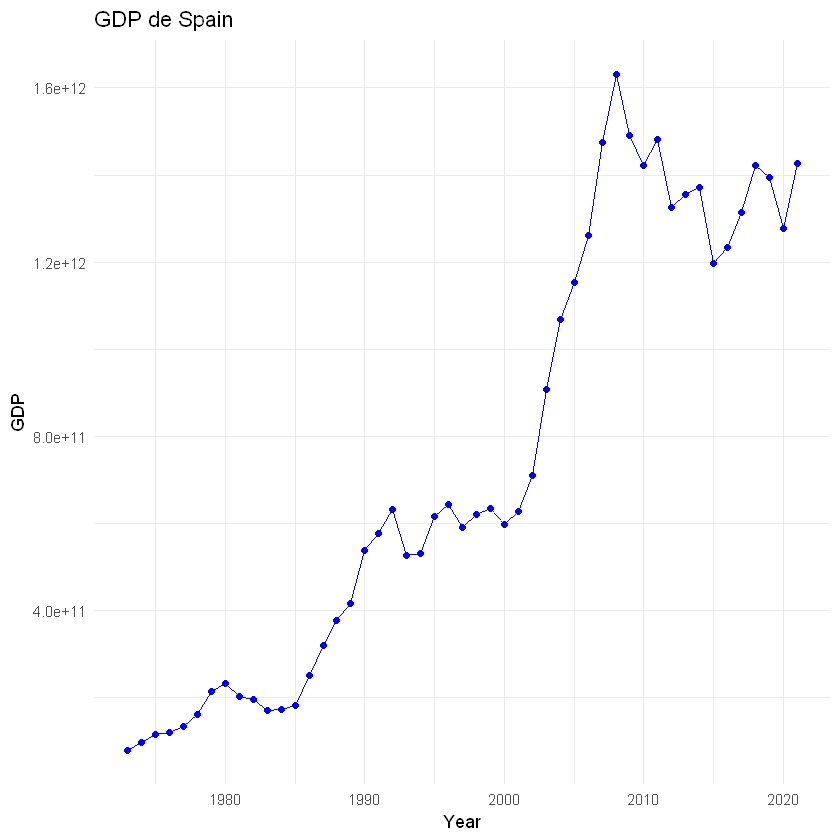

In [100]:
spain_GDP= df[df$Country == "spain", ]

ggplot(data = spain_GDP, aes(x = Year, y = GDP)) +
  geom_line(color = "blue") + 
  geom_point(color = "blue") +  
  labs(x = 'Year', y = 'GDP', title = 'GDP de Spain') +
  theme_minimal()

## correlation analysis

para la correlacion se necesita seguir limpiando el nombre de las columnas y facilitar el trabajo

In [103]:
colnames(df) <- gsub("\\.", "", colnames(df))
print(colnames(df))

 [1] "Year"               "Country"            "Region"            
 [4] "SubRegion"          "SurfAreaSqKm"       "PopDens"           
 [7] "PopGrowth"          "GDP"                "GDPGrowth"         
[10] "AdolFertRate"       "AgriValAddGDP"      "ExportsGDP"        
[13] "FertRate"           "FDINetBoP"          "GNICapAtlas"       
[16] "GNIAtlas"           "GrossCapFormGDP"    "ImportsGDP"        
[19] "IndValAddGDP"       "InflConsPric"       "LifeExpBirth"      
[22] "MerchTradeGDP"      "MilExpGDP"          "MobileSubs100"     
[25] "MortRateU5"         "NetMigr"            "PopTotal"          
[28] "RevenueExGrantsGDP" "SchEnrollPrim"      "TaxRevenueGDP"     
[31] "UrbanPopGrowth"    


Ahora, sí se puede empezar a trabajar mejor.

In [106]:
variables_matriz= c('GDP', 'GDPGrowth', 'PopDens', 'AdolFertRate', 
                       'AgriValAddGDP', 'ExportsGDP', 'FertRate', 'ImportsGDP', 
                       'InflConsPric', 'LifeExpBirth', 'MerchTradeGDP', 
                       'MortRateU5', 'NetMigr', 'PopTotal', 'RevenueExGrantsGDP', 
                       'SchEnrollPrim', 'TaxRevenueGDP', 'UrbanPopGrowth')

corr_matriz= cor(df[ , variables_matriz], use = "complete.obs")
correla_gdp= corr_matriz[c("GDP", "GDPGrowth"), ]

print(correla_gdp)

                  GDP   GDPGrowth     PopDens AdolFertRate AgriValAddGDP
GDP        1.00000000 -0.02410214 0.001777889  -0.16829201    -0.1592868
GDPGrowth -0.02410214  1.00000000 0.035392856   0.09564243     0.1649491
            ExportsGDP   FertRate ImportsGDP InflConsPric LifeExpBirth
GDP       -0.104180033 -0.1562306 -0.1641980  -0.01255646    0.1953931
GDPGrowth  0.009998372  0.1202253  0.0415861  -0.05365544   -0.1578427
          MerchTradeGDP MortRateU5     NetMigr  PopTotal RevenueExGrantsGDP
GDP         -0.12780908 -0.1377159  0.41769606 0.4582532        -0.02238402
GDPGrowth    0.04565427  0.1327865 -0.04713344 0.1037088        -0.07670784
          SchEnrollPrim TaxRevenueGDP UrbanPopGrowth
GDP          0.02255242   -0.06819271    -0.08855058
GDPGrowth    0.00359143   -0.06648686     0.17411711


Hay datos contradictorios. Solo me fijaré en el GDPGrowth

In [109]:
variables_matriz= c('GDP', 'GDPGrowth', 'PopDens', 'AdolFertRate', 
                       'AgriValAddGDP', 'ExportsGDP', 'FertRate', 'ImportsGDP', 
                       'InflConsPric', 'LifeExpBirth', 'MerchTradeGDP', 
                       'MortRateU5', 'NetMigr', 'PopTotal', 'RevenueExGrantsGDP', 
                       'SchEnrollPrim', 'TaxRevenueGDP', 'UrbanPopGrowth')

corr_matriz= cor(df[ , variables_matriz], use = "complete.obs")
correla_gdp= corr_matriz[c("GDPGrowth"), ]

print(correla_gdp)

               GDP          GDPGrowth            PopDens       AdolFertRate 
      -0.024102135        1.000000000        0.035392856        0.095642426 
     AgriValAddGDP         ExportsGDP           FertRate         ImportsGDP 
       0.164949060        0.009998372        0.120225292        0.041586095 
      InflConsPric       LifeExpBirth      MerchTradeGDP         MortRateU5 
      -0.053655441       -0.157842658        0.045654272        0.132786549 
           NetMigr           PopTotal RevenueExGrantsGDP      SchEnrollPrim 
      -0.047133443        0.103708788       -0.076707845        0.003591430 
     TaxRevenueGDP     UrbanPopGrowth 
      -0.066486856        0.174117105 


<!-- Hay varias correlaciones a destacar:

La población total y la migracion neta tienen una alta correlación positiva. Por lo que es un buen indicador para predecir el GDP.

A mayor esperanza de vida, se tiende a tener un mayor GDP. Así como un crecimiento urbano.

Y a cuanto mayor sea la fertilidad, el peso de la agricultura en la economía y la mortalidad, se tiende a tener un menor GDP. -->

In [112]:
# Linear regression model to predict GDP using the other variables
gdp_model <- lm(GDP ~ PopDens + AdolFertRate + AgriValAddGDP + ExportsGDP + 
                FertRate + ImportsGDP + InflConsPric + LifeExpBirth + 
                MerchTradeGDP + MortRateU5 + NetMigr + PopTotal + 
                RevenueExGrantsGDP + SchEnrollPrim + TaxRevenueGDP + 
                UrbanPopGrowth, data=df)

# Summary of the model
summary(gdp_model)


Call:
lm(formula = GDP ~ PopDens + AdolFertRate + AgriValAddGDP + ExportsGDP + 
    FertRate + ImportsGDP + InflConsPric + LifeExpBirth + MerchTradeGDP + 
    MortRateU5 + NetMigr + PopTotal + RevenueExGrantsGDP + SchEnrollPrim + 
    TaxRevenueGDP + UrbanPopGrowth, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.072e+12 -2.562e+11 -6.804e+10  1.662e+11  1.879e+13 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.509e+12  5.339e+11  -2.826 0.004741 ** 
PopDens             4.876e+07  4.172e+07   1.169 0.242528    
AdolFertRate       -3.108e+09  8.700e+08  -3.572 0.000360 ***
AgriValAddGDP      -1.504e+10  3.111e+09  -4.835 1.39e-06 ***
ExportsGDP         -7.688e+09  1.789e+09  -4.298 1.78e-05 ***
FertRate            1.695e+11  3.596e+10   4.713 2.55e-06 ***
ImportsGDP          3.751e+09  1.940e+09   1.933 0.053309 .  
InflConsPric        1.542e+07  8.105e+07   0.190 0.849135    
LifeExpBirth        2.59

In [114]:
# Linear regression model to predict GDP growth using the other variables
gdp_growth_model <- lm(GDPGrowth ~ PopDens + AdolFertRate + AgriValAddGDP + ExportsGDP + 
                FertRate + ImportsGDP + InflConsPric + LifeExpBirth + 
                MerchTradeGDP + MortRateU5 + NetMigr + PopTotal + 
                RevenueExGrantsGDP + SchEnrollPrim + TaxRevenueGDP + 
                UrbanPopGrowth, data=df)

# Summary of the model
summary(gdp_growth_model)



Call:
lm(formula = GDPGrowth ~ PopDens + AdolFertRate + AgriValAddGDP + 
    ExportsGDP + FertRate + ImportsGDP + InflConsPric + LifeExpBirth + 
    MerchTradeGDP + MortRateU5 + NetMigr + PopTotal + RevenueExGrantsGDP + 
    SchEnrollPrim + TaxRevenueGDP + UrbanPopGrowth, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.7942  -1.5967   0.2983   2.0128  28.0173 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.513e+00  2.085e+00   3.124 0.001803 ** 
PopDens             1.056e-04  1.629e-04   0.648 0.516717    
AdolFertRate       -9.782e-03  3.398e-03  -2.879 0.004013 ** 
AgriValAddGDP       4.186e-02  1.215e-02   3.446 0.000577 ***
ExportsGDP         -2.620e-03  6.986e-03  -0.375 0.707702    
FertRate           -2.976e-01  1.404e-01  -2.119 0.034179 *  
ImportsGDP          1.122e-02  7.577e-03   1.481 0.138734    
InflConsPric       -1.092e-03  3.165e-04  -3.451 0.000565 ***
LifeExpBirth       -8.249e-02  2.282e-

In [116]:
# ggplot(df, aes(x = GDP)) +
#     geom_histogram(binwidth = 1000, fill = "blue", color = "black", alpha = 0.7) +
#     labs(title = "Histogram of GDP",
#          x = "GDP",
#          y = "Frequency") +
#     theme_minimal()

In [118]:
# sum(is.na(df$GDP))

In [120]:
df= df[!is.na(df$GDP), ]

nrow(df)

[1] 8668

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


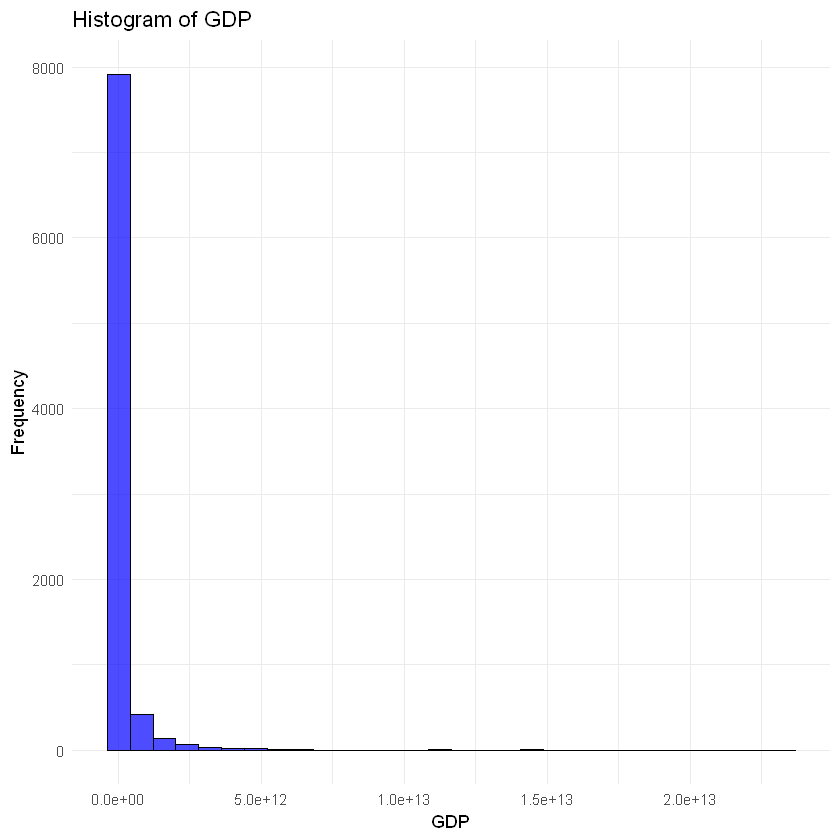

In [122]:
ggplot(df, aes(x = GDP)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.7) +  # Automatic binwidth
    labs(title = "Histogram of GDP",
         x = "GDP",
         y = "Frequency") +
    theme_minimal()

No dice nada esta gráfica

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


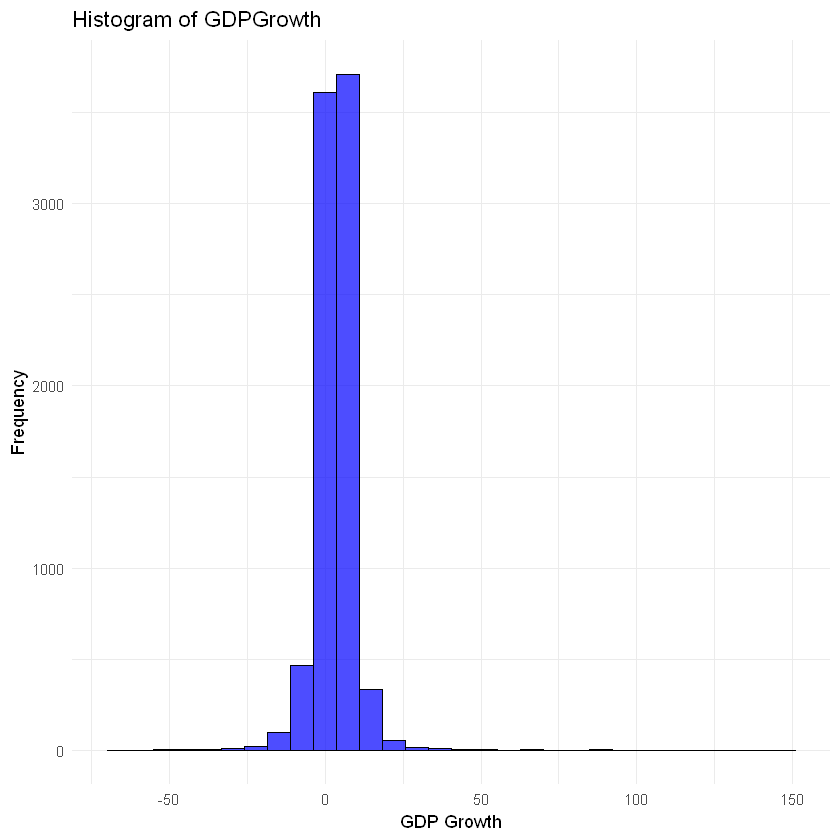

In [124]:
ggplot(df, aes(x = GDPGrowth)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.7) +  # Automatic binwidth
    labs(title = "Histogram of GDPGrowth",
         x = "GDP Growth",
         y = "Frequency") +
    theme_minimal()

Aquí se observa que los crecimientos de los países siguen una distribución normal. Ahora vamos a ver España

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


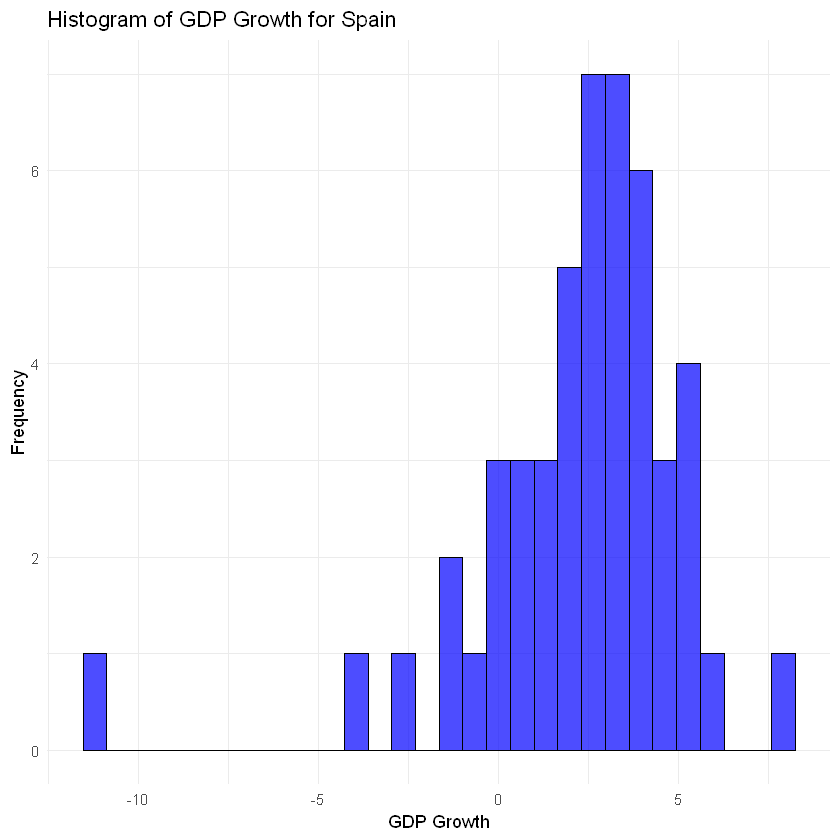

In [126]:
df_spain <- df %>% filter(Country == "spain")

ggplot(df_spain, aes(x = GDPGrowth)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.7) +  # Automatic binwidth
    labs(title = "Histogram of GDP Growth for Spain",
         x = "GDP Growth",
         y = "Frequency") +
    theme_minimal()

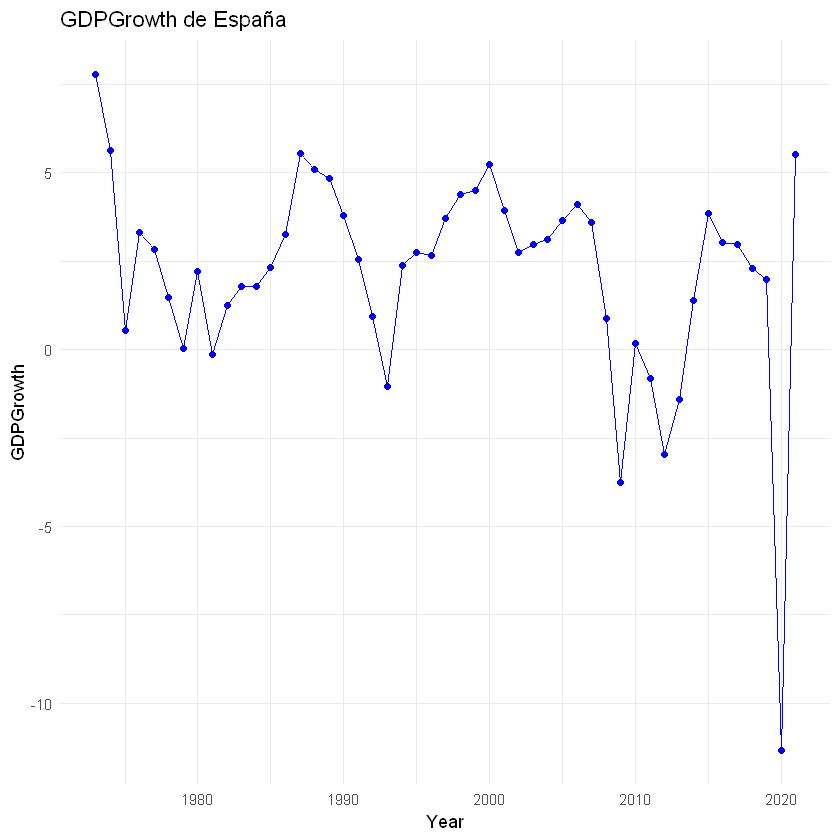

In [127]:
spain_GDPGrowth= df[df$Country == "spain", ]

ggplot(data = spain_GDPGrowth, aes(x = Year, y = GDPGrowth)) +
  geom_line(color = "blue") + 
  geom_point(color = "blue") +  
  labs(x = 'Year', y = 'GDPGrowth', title = 'GDPGrowth de España') +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


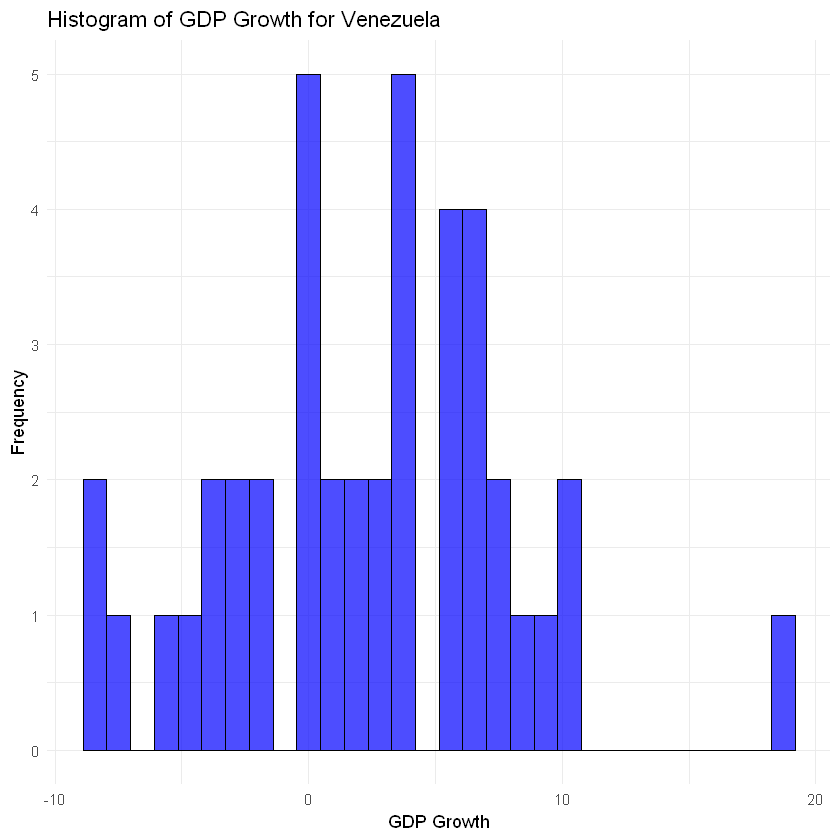

In [129]:
df_venezuela <- df %>% filter(Country == "venezuela, rb")

ggplot(df_venezuela, aes(x = GDPGrowth)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.7) +  # Automatic binwidth
    labs(title = "Histogram of GDP Growth for Venezuela",
         x = "GDP Growth",
         y = "Frequency") +
    theme_minimal()

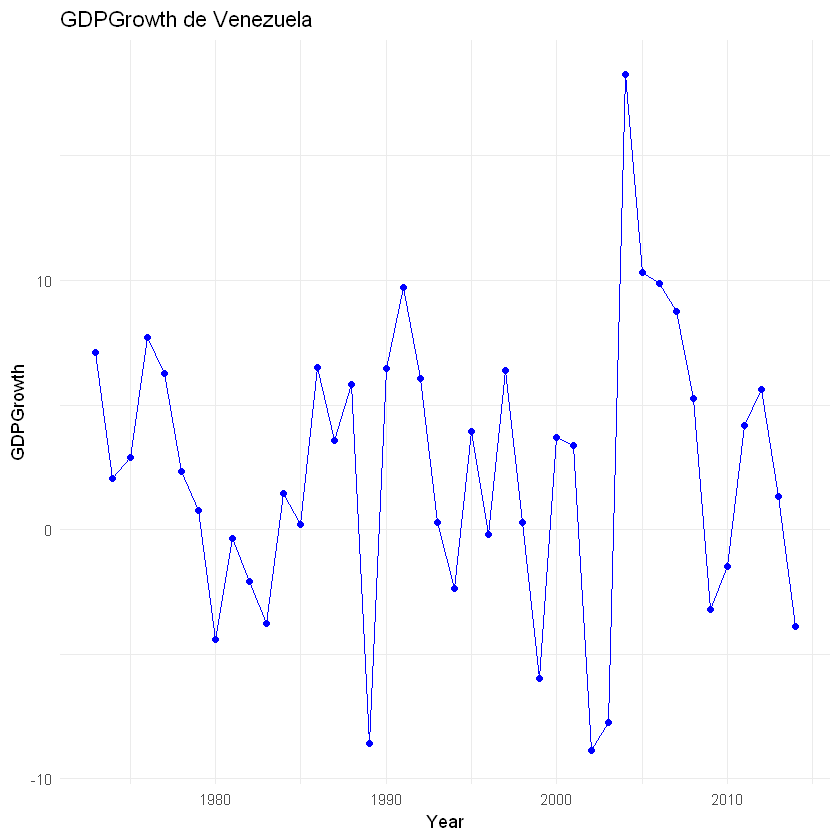

In [131]:
venezuela_GDPGrowth= df[df$Country == "venezuela, rb", ]

ggplot(data = venezuela_GDPGrowth, aes(x = Year, y = GDPGrowth)) +
  geom_line(color = "blue") + 
  geom_point(color = "blue") +  
  labs(x = 'Year', y = 'GDPGrowth', title = 'GDPGrowth de Venezuela') +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


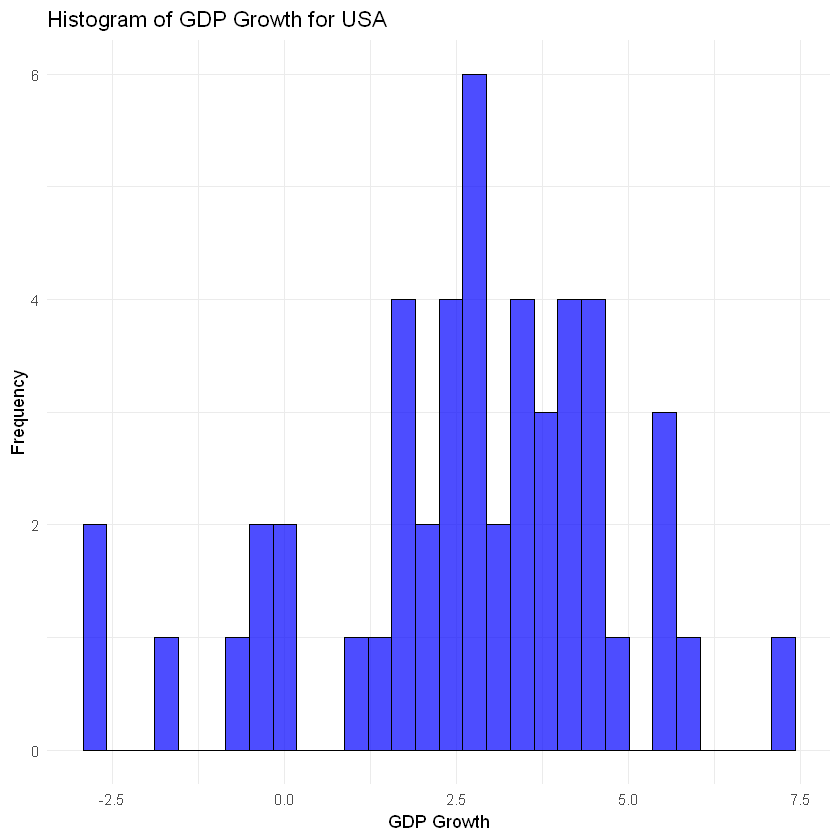

In [133]:
df_usa <- df %>% filter(Country == "united states")

ggplot(df_usa, aes(x = GDPGrowth)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.7) +  # Automatic binwidth
    labs(title = "Histogram of GDP Growth for USA",
         x = "GDP Growth",
         y = "Frequency") +
    theme_minimal()

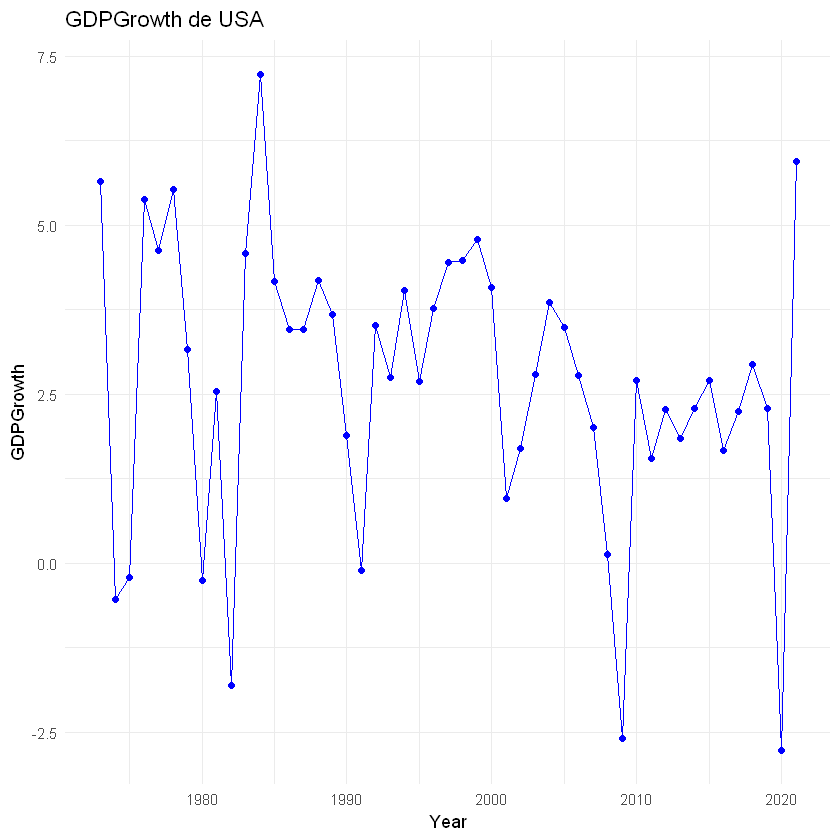

In [135]:
usa_GDPGrowth= df[df$Country == "united states", ]

ggplot(data = usa_GDPGrowth, aes(x = Year, y = GDPGrowth)) +
  geom_line(color = "blue") + 
  geom_point(color = "blue") +  
  labs(x = 'Year', y = 'GDPGrowth', title = 'GDPGrowth de USA') +
  theme_minimal()

## Empiezo a agrupar para saber relaciones con el GDP

In [138]:
df_group_region_GDP <- df %>% group_by(Region) %>% 
    summarise(mean_GDP = mean(GDP, na.rm = TRUE))

df_group_region_GDP

Region,mean_GDP
<chr>,<dbl>
Africa,21801112320
Americas,338873599577
Asia,281235279391
Europe,340805143061
Oceania,52391999718


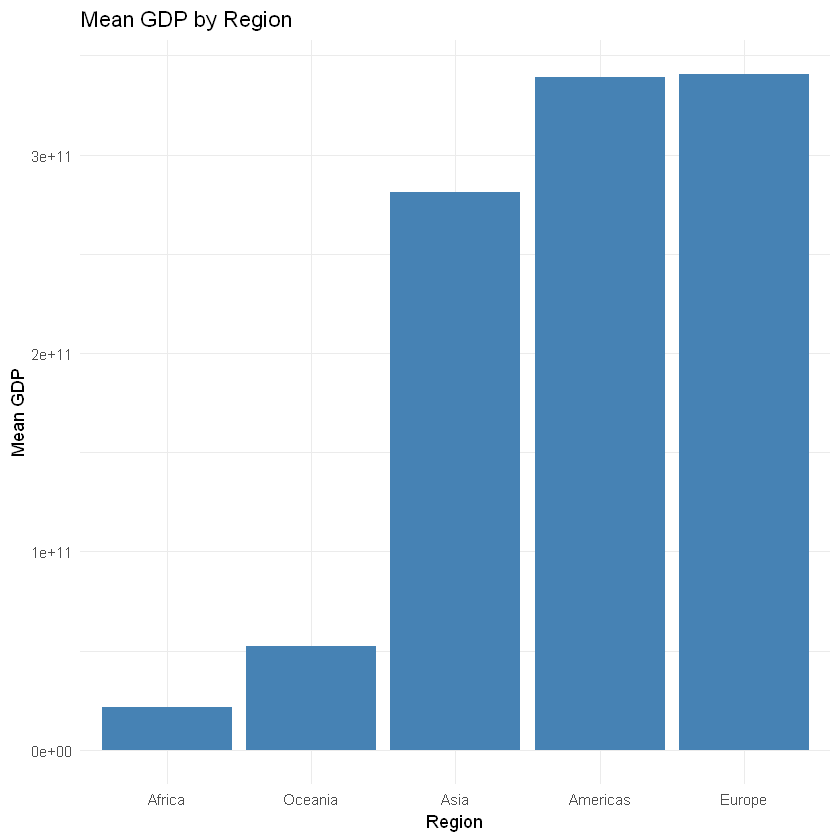

In [140]:
ggplot(df_group_region_GDP, aes(x = reorder(Region, mean_GDP), y = mean_GDP)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Mean GDP by Region",
       x = "Region",
       y = "Mean GDP") +
  theme_minimal()
  # coord_flip()  # Flips the axes for better readability 

In [142]:
df_group_region_GNI <- df %>% group_by(Region) %>% 
    summarise(mean_GNI = mean(GNICapAtlas, na.rm = TRUE))

df_group_region_GNI

Region,mean_GNI
<chr>,<dbl>
Africa,1460.107
Americas,8041.339
Asia,8345.082
Europe,21811.064
Oceania,7596.422


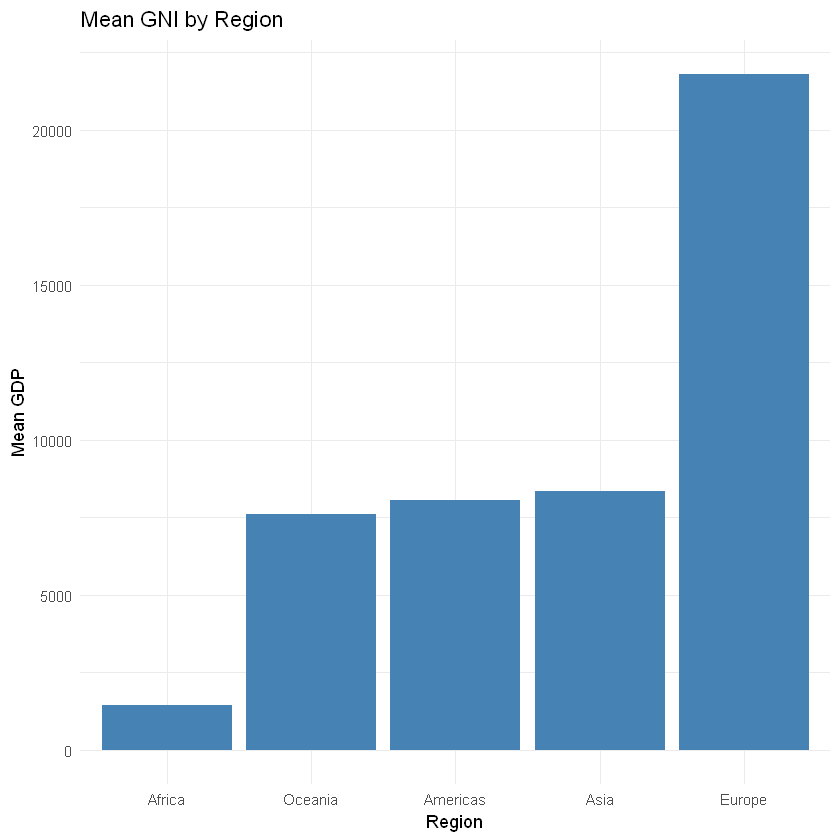

In [144]:
ggplot(df_group_region_GNI, aes(x = reorder(Region, mean_GNI), y = mean_GNI)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Mean GNI by Region",
       x = "Region",
       y = "Mean GDP") +
  theme_minimal()

In [146]:
# EEUU y Canadá serán incluidas. ¿Y si miro los países con mejor GNI?

In [148]:
# Filtering the dataframe for the year 2021
df_2021 <- subset(df, Year == 2021)

# Sorting the filtered dataframe by GNICapAtlas in descending order
sorted_df_2021_GNICap <- df_2021[order(-df_2021$GNICapAtlas), ]

# Selecting the top 30 countries
top_paises_GNICap <- head(sorted_df_2021_GNICap$Country, 34)

# Displaying the names of the top 30 countries
top_paises_GNICap

[1] "bermuda"              "switzerland"          "luxembourg"          
 [4] "norway"               "ireland"              "united states"       
 [7] "faroe islands"        "denmark"              "cayman islands"      
[10] "iceland"              "singapore"            "qatar"               
[13] "sweden"               "australia"            "netherlands"         
[16] "hong kong sar, china" "finland"              "austria"             
[19] "germany"              "belgium"              "israel"              
[22] "canada"               "new zealand"          "macao sar, china"    
[25] "united kingdom"       "france"               "united arab emirates"
[28] "japan"                "italy"                "korea, rep."         
[31] "kuwait"               "malta"                "brunei darussalam"   
[34] "spain"

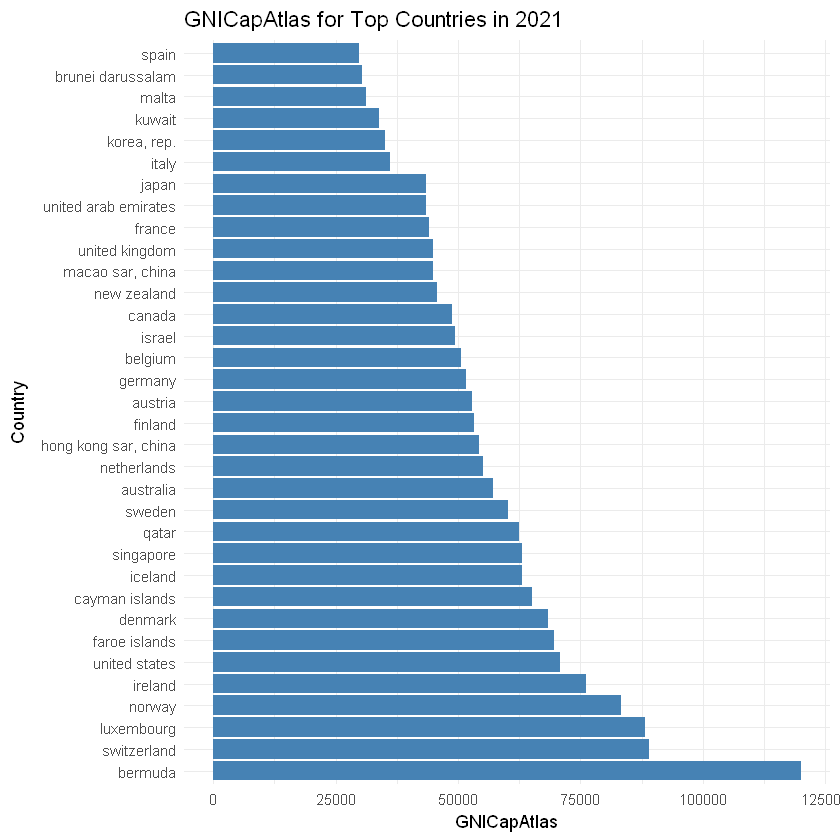

In [154]:
top_paises_GNICap = df_2021[df_2021$Country %in% c('bermuda', 'switzerland', 'luxembourg', 'norway', 'ireland', 
                                                        'united states', 'faroe islands', 'denmark', 'cayman islands', 
                                                        'iceland', 'singapore', 'qatar', 'sweden', 'australia', 
                                                        'netherlands', 'hong kong sar, china', 'finland', 'austria', 
                                                        'germany', 'belgium', 'israel', 'canada', 'new zealand', 
                                                        'macao sar, china', 'united kingdom', 'france', 
                                                        'united arab emirates', 'japan', 'italy', 'korea, rep.', 
                                                        'kuwait', 'malta', 'brunei darussalam', 'spain'), ]

# Plotting the bar chart for GNICapAtlas
ggplot(top_paises_GNICap, aes(x = reorder(Country, -GNICapAtlas), y = GNICapAtlas)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flips the chart for better readability
  labs(title = "GNICapAtlas for Top Countries in 2021", x = "Country", y = "GNICapAtlas") +
  theme_minimal()

      SurfAreaSqKm            PopDens          PopGrowth                GDP 
        0.09774781         0.05277084         0.18094622         0.19584989 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
       -0.23356281        -0.44687894        -0.56299684         0.31260594 
          FertRate          FDINetBoP           GNIAtlas    GrossCapFormGDP 
       -0.10915758         0.19746179         0.19550245        -0.20641929 
        ImportsGDP       IndValAddGDP       InflConsPric       LifeExpBirth 
        0.23870464        -0.34712777        -0.40860354         0.70635680 
     MerchTradeGDP          MilExpGDP      MobileSubs100         MortRateU5 
        0.13786013        -0.34191387         0.72786982        -0.59692185 
           NetMigr           PopTotal RevenueExGrantsGDP      SchEnrollPrim 
        0.17766053         0.04597344        -0.07584525        -0.04806532 
     TaxRevenueGDP     UrbanPopGrowth        GNICapAtlas 
       -0.11339087

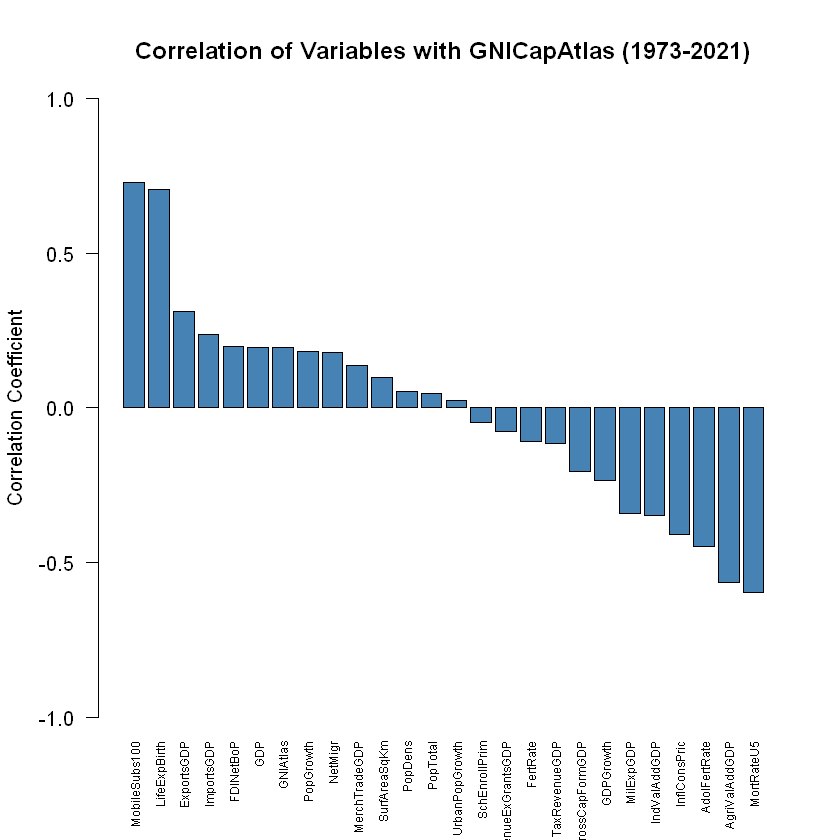

In [174]:
# Select relevant numeric columns for correlation analysis
numeric_columns <- c("SurfAreaSqKm", "PopDens", "PopGrowth", "GDP", "GDPGrowth", "AdolFertRate", 
                     "AgriValAddGDP", "ExportsGDP", "FertRate", "FDINetBoP", 
                     "GNIAtlas", "GrossCapFormGDP", "ImportsGDP", "IndValAddGDP", "InflConsPric", 
                     "LifeExpBirth", "MerchTradeGDP", "MilExpGDP", "MobileSubs100", "MortRateU5", 
                     "NetMigr", "PopTotal", "RevenueExGrantsGDP", "SchEnrollPrim", "TaxRevenueGDP", 
                     "UrbanPopGrowth", "GNICapAtlas")

# Filtering the dataframe for the top 30 countries across all years
# se ha excluido Bermuda porque era un valor muy extremo
top_30_countries_all_years <- df[df$Country %in% c('switzerland', 'luxembourg', 'norway', 'ireland', 
                                                   'united states', 'faroe islands', 'denmark', 'cayman islands', 
                                                   'iceland', 'singapore', 'qatar', 'sweden', 'australia', 
                                                   'netherlands', 'hong kong sar, china', 'finland', 'austria', 
                                                   'germany', 'belgium', 'israel', 'canada', 'new zealand', 
                                                   'macao sar, china', 'united kingdom', 'france', 
                                                   'united arab emirates', 'japan', 'italy', 'korea, rep.', 
                                                   'kuwait', 'malta', 'brunei darussalam', 'spain'), ]

# Select only the relevant numeric columns for analysis
top_30_numeric_data <- top_30_countries_all_years[, numeric_columns]

# Compute the correlation matrix
correlation_matrix <- cor(top_30_numeric_data, use = "complete.obs")

# Extract correlations of GNICapAtlas with the other variables
gni_correlations <- correlation_matrix["GNICapAtlas", ]

# Displaying the correlation numbers
print(gni_correlations)

# Visualizing the correlations with a bar plot (excluding GNICapAtlas itself)
gni_correlations <- gni_correlations[-which(names(gni_correlations) == "GNICapAtlas")]

# Plotting the correlations
barplot(sort(gni_correlations, decreasing = TRUE), 
        main = "Correlation of Variables with GNICapAtlas (1973-2021)", 
        col = "steelblue", 
        las = 2, 
        cex.names = 0.6,             # Adjust text size for better fit
        # xlab = "Variables", 
        ylab = "Correlation Coefficient", 
        ylim = c(-1, 1))

In [97]:
# Ahora que tengo las variables que podrían predecir el crecimiento de un país, ¿Cómo predigo tales resultados? ¿Con qué método?

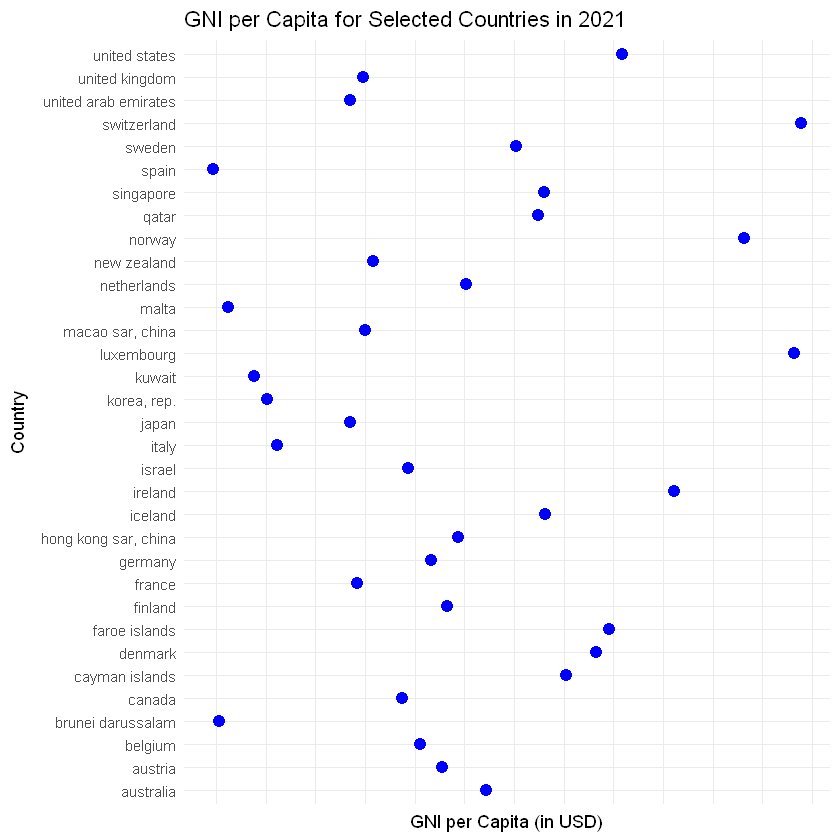

In [212]:
# Load necessary library
library(ggplot2)

# Filter the data for the year 2021
gni_2021 <- subset(top_30_countries_all_years, Year == 2021)

# Create a scatter plot for GNI values for the year 2021 for selected countries
ggplot(gni_2021, aes(x = Country, y = GNICapAtlas)) +
  geom_point(size = 3, color = "blue") +  # Add points with a fixed color
  labs(title = "GNI per Capita for Selected Countries in 2021",
       x = "Country",
       y = "GNI per Capita (in USD)") +
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_blank(),  # Remove country names on the x-axis
        axis.ticks.x = element_blank(),  # Remove x-axis ticks
        legend.position = "none") +  # Remove legend
  coord_flip()  # Flip the coordinates for better readability

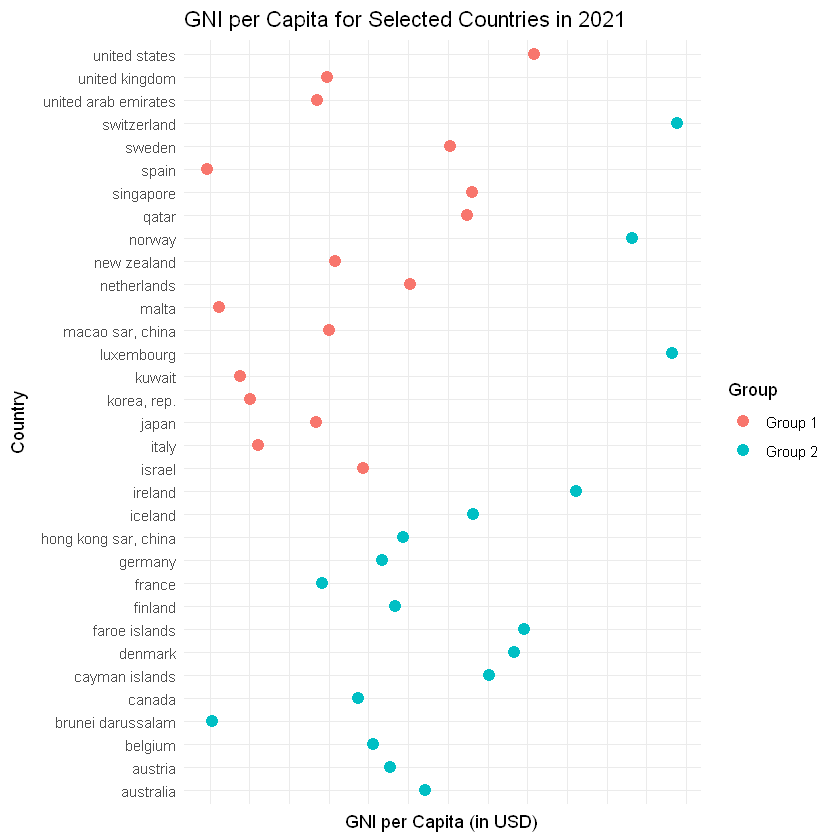

In [216]:
# Load necessary library
library(ggplot2)

# Filter the data for the year 2021
gni_2021 <- subset(top_30_countries_all_years, Year == 2021)

# Define the first group of countries
first_group <- c("united states", "united kingdom", "united arab emirates", 
                 "sweden", "spain", "singapore", "qatar", "new zealand", 
                 "netherlands", "malta", "macao sar, china", "kuwait", 
                 "korea, rep.", "japan", "italy", "israel")

# Define groups for the countries
gni_2021$Group <- ifelse(gni_2021$Country %in% first_group, 
                         "Group 1", "Group 2")  # Group 2 for the remaining countries

# Create a scatter plot for GNI values for the year 2021 for selected countries
ggplot(gni_2021, aes(x = Country, y = GNICapAtlas, color = Group)) +
  geom_point(size = 3) +  # Add points with size for better visibility
  labs(title = "GNI per Capita for Selected Countries in 2021",
       x = "Country",
       y = "GNI per Capita (in USD)") +
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_blank(),  # Remove country names on the x-axis
        axis.ticks.x = element_blank(),  # Remove x-axis ticks
        legend.position = "right") +  # Show legend to differentiate groups
  coord_flip()  # Flip the coordinates for better readability

`geom_smooth()` using formula = 'y ~ x'


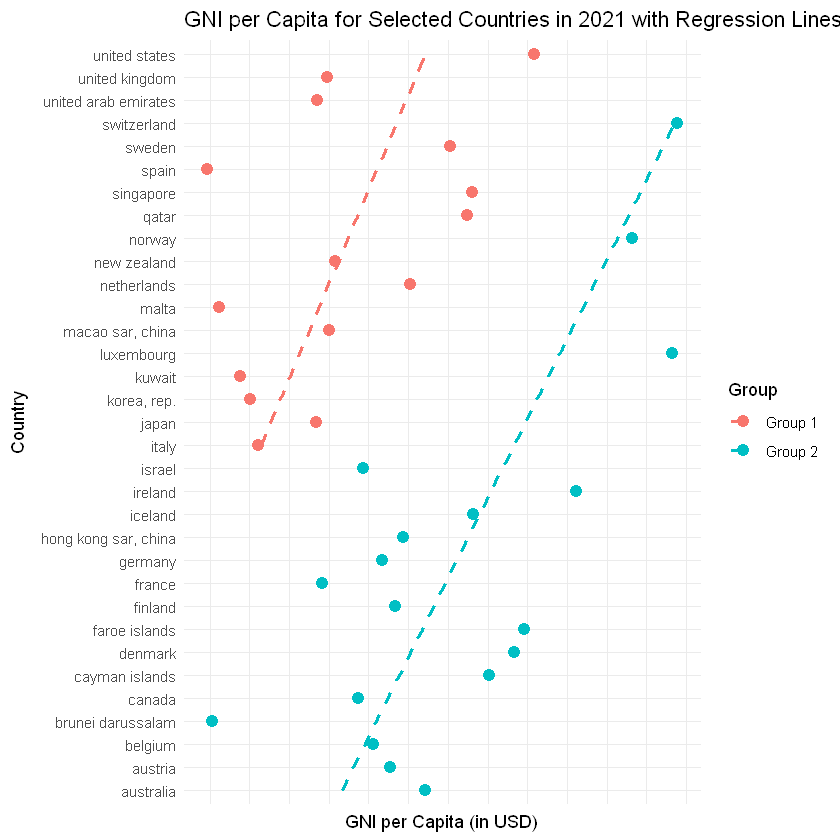

In [218]:
# Load necessary library
library(ggplot2)

# Filter the data for the year 2021
gni_2021 <- subset(top_30_countries_all_years, Year == 2021)

# Define the first group of countries
first_group <- c("united states", "united kingdom", "united arab emirates", 
                 "sweden", "spain", "singapore", "qatar", "new zealand", 
                 "netherlands", "malta", "macao sar, china", "kuwait", 
                 "korea, rep.", "japan", "italy")

# Define groups for the countries
gni_2021$Group <- ifelse(gni_2021$Country %in% first_group, 
                         "Group 1", "Group 2")  # Group 2 for the remaining countries

# Create a scatter plot for GNI values for the year 2021 for selected countries with regression lines
ggplot(gni_2021, aes(x = Country, y = GNICapAtlas, color = Group)) +
  geom_point(size = 3) +  # Add points with size for better visibility
  geom_smooth(method = "lm", se = FALSE, aes(group = Group), linetype = "dashed") +  # Add regression lines
  labs(title = "GNI per Capita for Selected Countries in 2021 with Regression Lines",
       x = "Country",
       y = "GNI per Capita (in USD)") +
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_blank(),  # Remove country names on the x-axis
        axis.ticks.x = element_blank(),  # Remove x-axis ticks
        legend.position = "right") +  # Show legend to differentiate groups
  coord_flip()  # Flip the coordinates for better readability

In [222]:
# Load necessary library
library(dplyr)

# Filter the data for the years from 1973 to 2021
gni_filtered <- top_30_countries_all_years %>%
  filter(Year >= 1973 & Year <= 2021)

# Define the first group of countries
first_group <- c("united states", "united kingdom", "united arab emirates", 
                 "sweden", "spain", "singapore", "qatar", "new zealand", 
                 "netherlands", "malta", "macao sar, china", "kuwait", 
                 "korea, rep.", "japan", "italy")

# Define groups for the countries
gni_filtered$Group <- ifelse(gni_filtered$Country %in% first_group, 
                              "Group 1", "Group 2")  # Group 2 for the remaining countries

# Fit linear models for each group using Year as a predictor
model_group_1 <- lm(GNICapAtlas ~ Year, data = gni_filtered[gni_filtered$Group == "Group 1", ])
model_group_2 <- lm(GNICapAtlas ~ Year, data = gni_filtered[gni_filtered$Group == "Group 2", ])

# Summarize the models
summary_group_1 <- summary(model_group_1)
summary_group_2 <- summary(model_group_2)

# Print the summaries
print("Statistics for Group 1:")
print(summary_group_1)

print("Statistics for Group 2:")
print(summary_group_2)

[1] "Statistics for Group 1:"

Call:
lm(formula = GNICapAtlas ~ Year, data = gni_filtered[gni_filtered$Group == 
    "Group 1", ])

Residuals:
   Min     1Q Median     3Q    Max 
-22217  -6983     87   6263  49902 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.069e+06  5.855e+04  -35.34   <2e-16 ***
Year         1.048e+03  2.929e+01   35.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10280 on 639 degrees of freedom
  (83 observations deleted due to missingness)
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6667 
F-statistic:  1281 on 1 and 639 DF,  p-value: < 2.2e-16

[1] "Statistics for Group 2:"

Call:
lm(formula = GNICapAtlas ~ Year, data = gni_filtered[gni_filtered$Group == 
    "Group 2", ])

Residuals:
   Min     1Q Median     3Q    Max 
-30459  -7979  -1409   4474  54240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.513e+06  6.455e+04

`geom_smooth()` using formula = 'y ~ x'


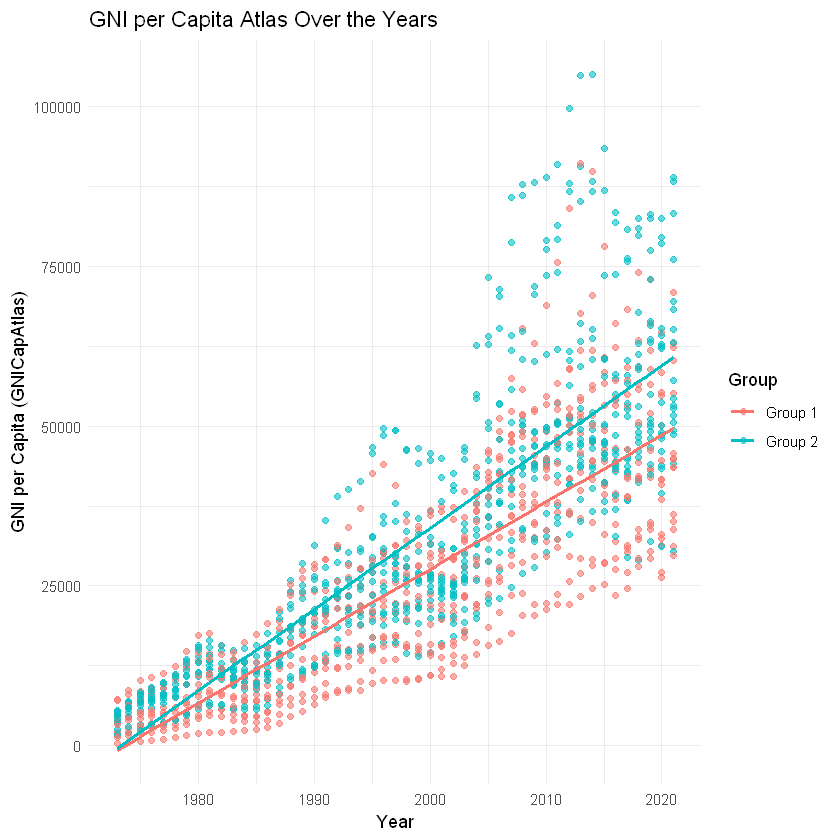

In [224]:
# Load necessary library
library(ggplot2)

# Create a ggplot with points and regression lines for each group
ggplot(gni_filtered, aes(x = Year, y = GNICapAtlas, color = Group)) +
  geom_point(alpha = 0.6) +  # Scatter plot points
  geom_smooth(method = "lm", se = FALSE, aes(group = Group), linetype = "solid") +  # Regression lines
  labs(title = "GNI per Capita Atlas Over the Years",
       x = "Year",
       y = "GNI per Capita (GNICapAtlas)",
       color = "Group") +
  theme_minimal()


Call:
lm(formula = GNICapAtlas ~ ., data = top_30_countries_all_years[, 
    c(selected_features_with_time, "GNICapAtlas")])

Residuals:
   Min     1Q Median     3Q    Max 
-29708  -6891   -453   5277  56172 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.421e+05  1.669e+05  -4.445 9.83e-06 ***
PopGrowth      5.851e+02  3.128e+02   1.871 0.061698 .  
GDP            8.683e-10  1.994e-10   4.355 1.48e-05 ***
ExportsGDP     5.892e+02  5.128e+01  11.489  < 2e-16 ***
FertRate       2.791e+03  1.180e+03   2.365 0.018216 *  
FDINetBoP      4.636e-09  7.154e-09   0.648 0.517122    
LifeExpBirth   1.679e+03  3.523e+02   4.764 2.19e-06 ***
MobileSubs100  6.525e+01  1.676e+01   3.894 0.000106 ***
MortRateU5    -1.105e+02  1.710e+02  -0.646 0.518504    
ImportsGDP    -6.326e+02  5.607e+01 -11.284  < 2e-16 ***
IndValAddGDP  -1.829e+02  4.626e+01  -3.954 8.26e-05 ***
Year           3.186e+02  8.876e+01   3.590 0.000348 ***
---
Signif. codes:  0 '***' 0.001 

     Actual   Predicted
2      4970          NA
12     2090          NA
23     4670          NA
38      430          NA
48     2540          NA
58     4700          NA
70     4690          NA
74     3660          NA
90     7290          NA
95       NA          NA
97     3580          NA
102      NA          NA
103    4650          NA
110    3920          NA
127    1600          NA
129    5200          NA
134    1750          NA
137    3250          NA
139      NA          NA
147    5580          NA
157    1260          NA
173      NA          NA
181    5320          NA
185    4030          NA
193      NA          NA
195    7050          NA
201      NA          NA
211    4370          NA
218      NA          NA
220      NA          NA
240      NA          NA
245      NA          NA
253      NA          NA
261    7980          NA
265    4650          NA
275    4490          NA
285    6750          NA
286    2150          NA
291    3930          NA
292    6850          NA
294    6800     

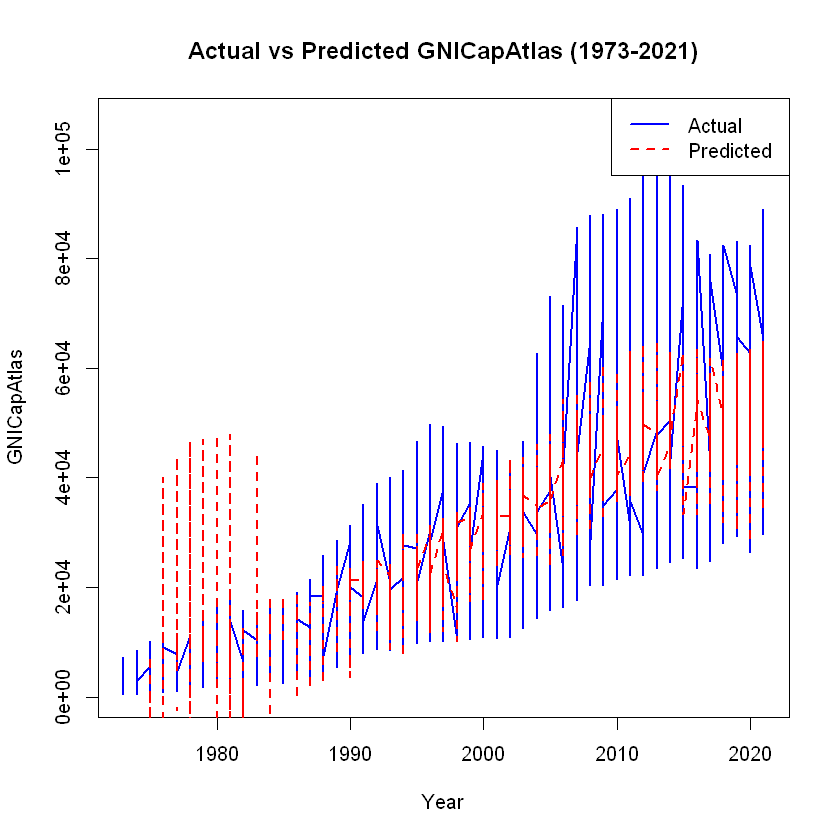

In [184]:
# Load necessary libraries
library(MASS)

# List of selected features based on correlation (you can adjust these based on the correlation results)
selected_features <- c("PopGrowth", "GDP", "ExportsGDP", "FertRate", "FDINetBoP", 
                       "LifeExpBirth", "MobileSubs100", "MortRateU5", "ImportsGDP", 
                       "IndValAddGDP")

# Add 'Year' to the list of selected features to account for time trends
selected_features_with_time <- c(selected_features, "Year")

# Build the linear regression model with the selected features and Year
model_with_time <- lm(GNICapAtlas ~ ., data = top_30_countries_all_years[, c(selected_features_with_time, "GNICapAtlas")])

# View the summary of the model to see the coefficients and statistics
summary(model_with_time)

# Predict the GNICapAtlas using the model for the given data
predicted_values_time <- predict(model_with_time, top_30_countries_all_years)

# Compare the predicted values with the actual values
comparison_time <- data.frame(Actual = top_30_countries_all_years$GNICapAtlas, Predicted = predicted_values_time)

# Display the comparison of actual vs predicted values
print(comparison_time)

# Optionally, plot the actual vs predicted GNICapAtlas for visual comparison
plot(top_30_countries_all_years$Year, top_30_countries_all_years$GNICapAtlas, 
     type = "l", col = "blue", lwd = 2, xlab = "Year", ylab = "GNICapAtlas", main = "Actual vs Predicted GNICapAtlas (1973-2021)")
lines(top_30_countries_all_years$Year, predicted_values_time, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), lty = c(1, 2), lwd = 2)


      SurfAreaSqKm            PopDens          GDPGrowth      AgriValAddGDP 
                27                 54                103                391 
        ExportsGDP           FertRate          FDINetBoP        GNICapAtlas 
                68                 16                 56                166 
          GNIAtlas    GrossCapFormGDP         ImportsGDP       IndValAddGDP 
               166                 82                 68                386 
      InflConsPric       LifeExpBirth      MerchTradeGDP          MilExpGDP 
               103                 15                 56                259 
     MobileSubs100         MortRateU5 RevenueExGrantsGDP      SchEnrollPrim 
                81                129                386                164 
     TaxRevenueGDP 
               373 



Call:
lm(formula = GNICapAtlas ~ ., data = data_to_use[, c(selected_features_with_time, 
    "GNICapAtlas")])

Residuals:
   Min     1Q Median     3Q    Max 
-34127  -6591   -340   5795  49602 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.023e+06  2.029e+05  -5.043 5.82e-07 ***
PopGrowth      6.520e+02  8.623e+02   0.756  0.44984    
GDP            1.005e-09  2.540e-10   3.957 8.36e-05 ***
ExportsGDP     1.057e+03  7.607e+01  13.892  < 2e-16 ***
FertRate       3.786e+03  1.572e+03   2.409  0.01626 *  
FDINetBoP      3.218e-09  7.759e-09   0.415  0.67849    
LifeExpBirth   1.314e+03  4.438e+02   2.961  0.00317 ** 
MobileSubs100  5.134e+01  2.027e+01   2.533  0.01152 *  
MortRateU5    -1.342e+02  1.929e+02  -0.695  0.48706    
ImportsGDP    -1.142e+03  8.551e+01 -13.360  < 2e-16 ***
IndValAddGDP   4.758e+01  7.751e+01   0.614  0.53947    
Year           4.704e+02  1.097e+02   4.290 2.04e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

     Actual   Predicted
423    8380   2191.8524
466    6320  -1952.2665
469    6750   9202.0760
474    7470  11666.6253
512     660 -12362.1705
551    8080   6731.0910
636    6840   3063.4567
688    8170  11907.6693
690    7170   7470.0701
703    9150   -412.1000
747    5980    393.3826
762     810  -6375.2844
804    8960   2155.1410
857     970  -4055.4737
901    8910  10658.6005
913    9780   4646.2044
953    7840   8917.4791
957    7190   7932.6687
975    6660   -729.4253
979    9960   -547.9538
1016  11170   6506.2454
1032  10240  10222.2877
1043   1280  -6843.0666
1115   8860  11100.4309
1117   7910  11027.3744
1138   7540   3124.2828
1182  11110  10563.9459
1219  10850  11199.6425
1225  13110  13093.2769
1236  13560   6112.6424
1237   9540   9460.9658
1252   6530   6925.8597
1273  12500  10874.2115
1324   9620   3746.9850
1369   1680  -7906.6400
1462   7670   7664.7516
1474  11450   7607.0206
1500  15650  17819.7737
1532  13100   9809.1480
1536  11460   2625.6739
1551   1870  -87

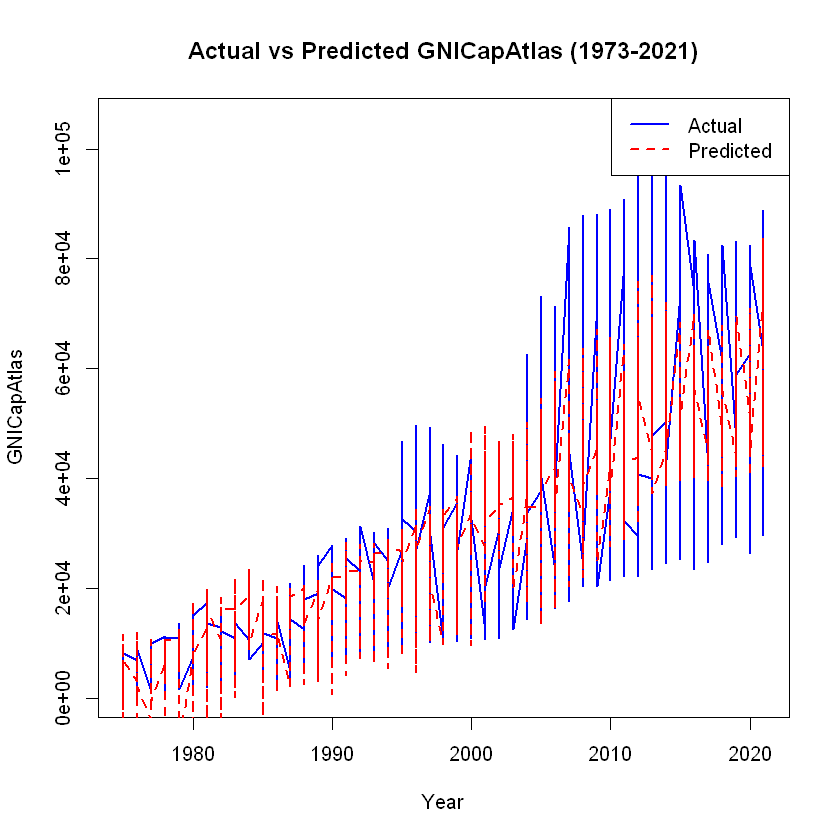

In [188]:
# Load necessary libraries
library(MASS)

# Check for missing values in the dataset
missing_values <- colSums(is.na(top_30_countries_all_years))
print(missing_values[missing_values > 0])

# Option 1: Remove rows with missing values
top_30_countries_all_years_clean <- na.omit(top_30_countries_all_years)

# Option 2: Impute missing values (if you prefer this method)
# Example: Replace NA with the mean of the respective column
# Note: This can distort the data, so use with caution
top_30_countries_all_years_imputed <- top_30_countries_all_years
for (col in selected_features_with_time) {
    top_30_countries_all_years_imputed[[col]][is.na(top_30_countries_all_years_imputed[[col]])] <- 
        mean(top_30_countries_all_years_imputed[[col]], na.rm = TRUE)
}

# Choose which cleaned dataset to use: 
# Cleaned dataset without missing values
data_to_use <- top_30_countries_all_years_clean 
# or 
# Imputed dataset
# data_to_use <- top_30_countries_all_years_imputed 

# Build the linear regression model with the selected features and Year
model_with_time <- lm(GNICapAtlas ~ ., data = data_to_use[, c(selected_features_with_time, "GNICapAtlas")])

# View the summary of the model to see the coefficients and statistics
summary(model_with_time)

# Predict the GNICapAtlas using the model for the given data
predicted_values_time <- predict(model_with_time, data_to_use)

# Compare the predicted values with the actual values
comparison_time <- data.frame(Actual = data_to_use$GNICapAtlas, Predicted = predicted_values_time)

# Display the comparison of actual vs predicted values
print(comparison_time)

# Optionally, plot the actual vs predicted GNICapAtlas for visual comparison
plot(data_to_use$Year, data_to_use$GNICapAtlas, 
     type = "l", col = "blue", lwd = 2, xlab = "Year", ylab = "GNICapAtlas", main = "Actual vs Predicted GNICapAtlas (1973-2021)")
lines(data_to_use$Year, predicted_values_time, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), lty = c(1, 2), lwd = 2)

Series: gni_ts 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1      drift
      0.9005  1857.2987
s.e.  0.1180   980.0549

sigma^2 = 7758855:  log likelihood = -242.92
AIC=491.84   AICc=492.93   BIC=495.61

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -12.18318 2626.168 1994.101 -0.7934201 3.829085 0.5860302
                  ACF1
Training set 0.1450637

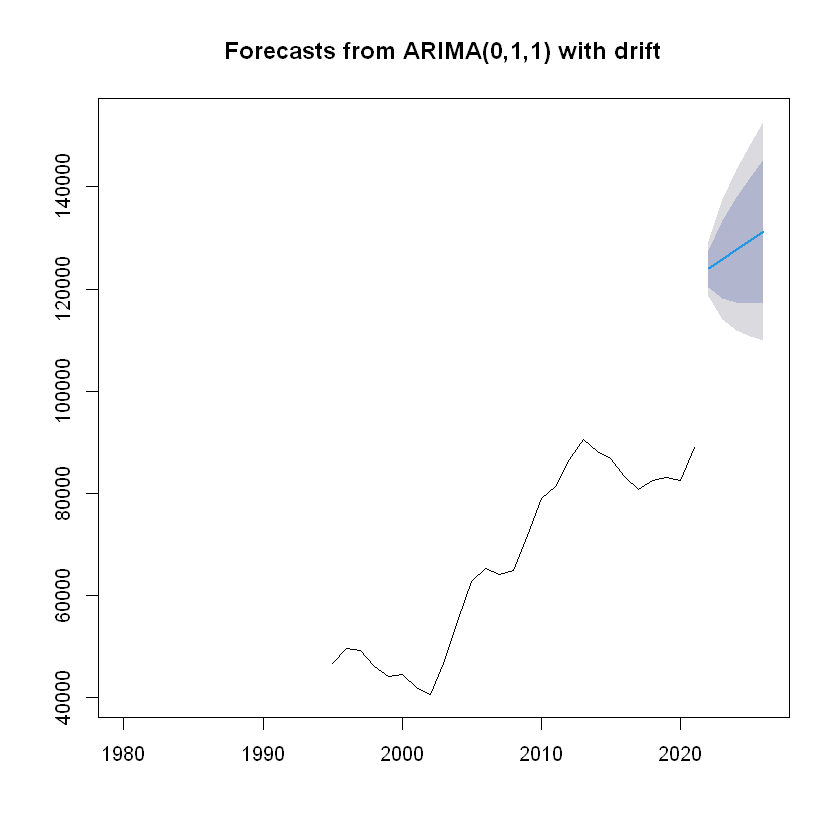

In [196]:
# Load necessary library
library(forecast)

# Filter the data for one country to demonstrate the time series model
# Suppose you want to predict for Switzerland
switzerland_data <- top_30_countries_all_years[top_30_countries_all_years$Country == 'switzerland', ]

# Create a time series object for GNICapAtlas for Switzerland
gni_ts <- ts(switzerland_data$GNICapAtlas, start = min(switzerland_data$Year), end = max(switzerland_data$Year))

# Fit an ARIMA model to the time series
arima_model <- auto.arima(gni_ts)

# Summarize the ARIMA model
summary(arima_model)

# Forecast future GNICapAtlas values (for demonstration)
forecast_gni <- forecast(arima_model, h = 5)

# Plot the forecast
plot(forecast_gni)

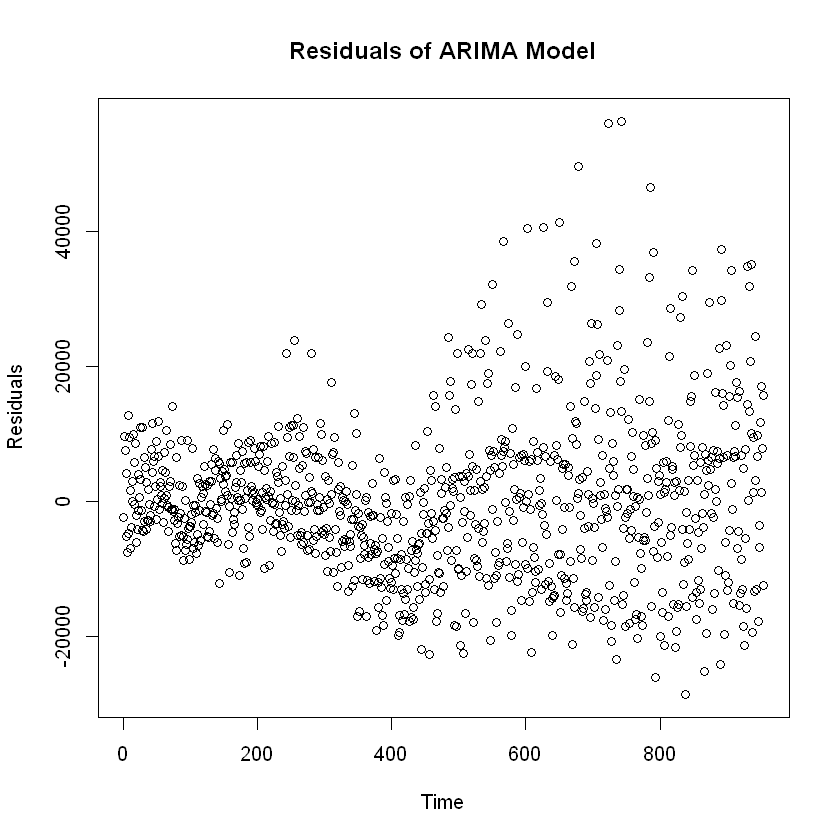

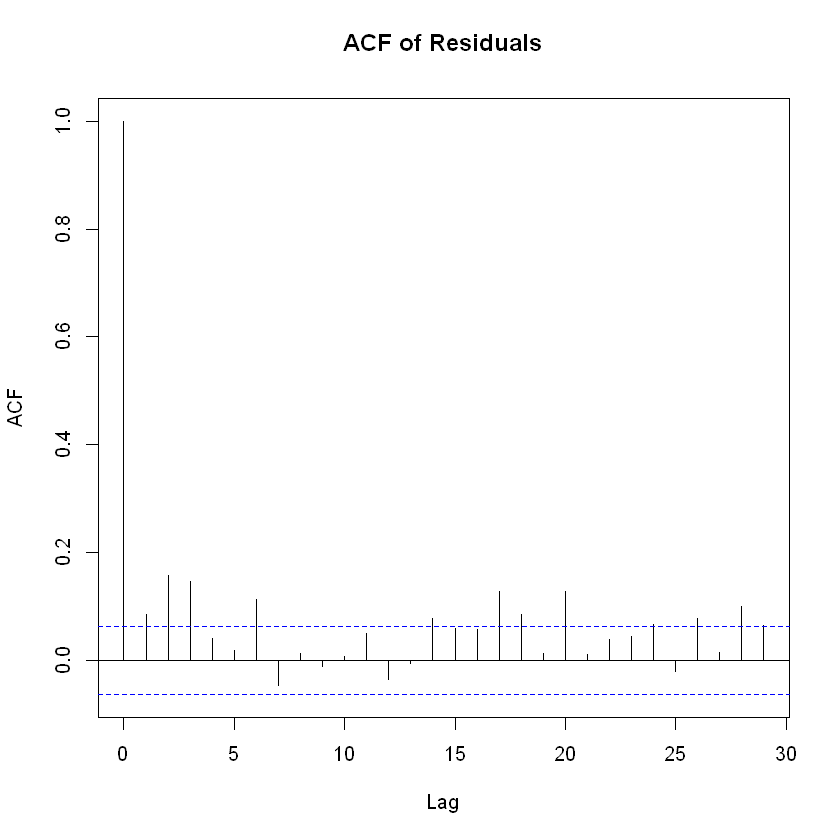

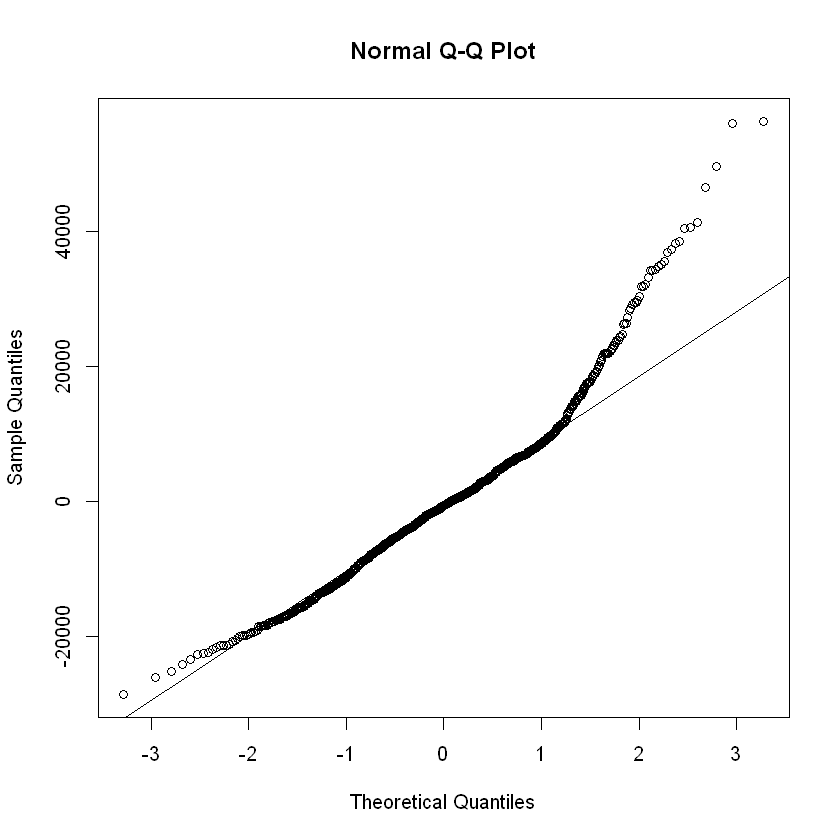

In [198]:
# Residuals
residuals <- residuals(model)  # Replace 'model' with your fitted ARIMA model

# Plot residuals
plot(residuals, main="Residuals of ARIMA Model", ylab="Residuals", xlab="Time")

# ACF of residuals
acf(residuals, main="ACF of Residuals")

# Q-Q plot for normality check
qqnorm(residuals)
qqline(residuals)

In [175]:
# Calculate total GDP for Europe in 2021
total_gdp_europe_2021 <- df %>%
  filter(Region == "Europe", Year == 2021) %>%
  summarise(total_GDP = sum(GDP, na.rm = TRUE)) %>%
  pull(total_GDP)  # Extract the total GDP value

# Calculate percentage weight of each country in 2021
europe_gdp_weight_2021 <- df %>%
  filter(Region == "Europe", Year == 2021) %>%
  select(Country, GDP) %>%
  mutate(percentage_weight = (GDP / total_gdp_europe_2021) * 100) %>%  # Calculate percentage weight
  arrange(desc(GDP))  # Sort by GDP in descending order

# Display the result
print(europe_gdp_weight_2021)

                  Country          GDP percentage_weight
1                 germany 4.259935e+12       17.85615000
2          united kingdom 3.122480e+12       13.08834022
3                  france 2.957880e+12       12.39839241
4                   italy 2.114356e+12        8.86263624
5      russian federation 1.836892e+12        7.69960601
6                   spain 1.427381e+12        5.98307816
7             netherlands 1.011799e+12        4.24110520
8             switzerland 8.006402e+11        3.35600215
9                  poland 6.794419e+11        2.84798166
10                 sweden 6.368562e+11        2.66947752
11                belgium 5.943520e+11        2.49131454
12                ireland 5.041826e+11        2.11335628
13                 norway 4.902934e+11        2.05513747
14                austria 4.803684e+11        2.01353552
15                denmark 3.983033e+11        1.66954734
16                finland 2.963876e+11        1.24235276
17                romania 2.854

In [179]:
# Calculate total GNI per capita for Europe in 2021
total_gni_cap_europe_2021 <- df %>%
  filter(Region == "Europe", Year == 2021) %>%
  summarise(total_GNI_Cap = sum(GNICapAtlas, na.rm = TRUE)) %>%
  pull(total_GNI_Cap)  # Extract the total GNI per capita value

# Calculate percentage weight of each country in GNI per capita for 2021
europe_gni_weight_2021 <- df %>%
  filter(Region == "Europe", Year == 2021) %>%
  select(Country, GNICapAtlas) %>%
  mutate(percentage_weight = (GNICapAtlas / total_gni_cap_europe_2021) * 100) %>%  # Calculate percentage weight
  arrange(desc(GNICapAtlas))  # Sort by GNI per capita in descending order

# Display the result
print(europe_gni_weight_2021)

                  Country GNICapAtlas percentage_weight
1             switzerland       88910         6.4648653
2              luxembourg       88190         6.4125124
3                  norway       83190         6.0489500
4                 ireland       76110         5.5341458
5           faroe islands       69560         5.0578791
6                 denmark       68300         4.9662614
7                 iceland       63140         4.5910651
8                  sweden       60210         4.3780176
9             netherlands       55180         4.0122739
10                finland       53280         3.8741202
11                austria       52760         3.8363097
12                germany       51660         3.7563260
13                belgium       50530         3.6741609
14         united kingdom       44790         3.2567913
15                 france       44160         3.2109825
16                  italy       36130         2.6271014
17                  malta       31160         2.